## Implementação da rede perceptron Multicamadas - Problema de classificação
#### Classificação da flor Iris

Dados de Entrada
1. Comprimento da sépala em cm
2. Largura da sépala em cm
3. Comprimento da pétala em cm
4. Largura da pétala em cm

Dados de Saída
5. Classe:
* Iris setosa
* Iris versicolor
* Iris Virginia

In [ ]:
# Importação das bibliotecas
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt # graficos
from sklearn.model_selection import train_test_split # divide dados em treino e teste
from sklearn.preprocessing import StandardScaler # padronizar os dados

In [ ]:
# carregando os dados
dados = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [ ]:
dados.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
from os import listxattr
list = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'classe']
dados.columns = list
dados.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
dados.info() #infos do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  149 non-null    float64
 1   largura_sepala      149 non-null    float64
 2   comprimento_petala  149 non-null    float64
 3   largura_petala      149 non-null    float64
 4   classe              149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
# Dividir o dataset

classes = dados['classe'].unique()

In [ ]:
print(classes)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
x = dados.iloc[:,0:4].values # Dados de entrada do modelo
y = dados['classe'].values # Dados de saída (desejada)

In [ ]:
# Dividir os dados em treino e teste
dados_entrada_treino, dados_entrada_teste, dados_saida_treino, dados_saida_teste = train_test_split(x, y, test_size=0.2)

In [ ]:
sc = StandardScaler()
sc.fit(dados_entrada_treino)
dados_entrada_treino_padronizados = sc.fit_transform(dados_entrada_treino)
dados_entrada_teste_padronizados = sc.fit_transform(dados_entrada_teste)

# print(dados_entrada_treino_padronizados)

In [ ]:
dados_saida_treino_onhot = pd.get_dummies(dados_saida_treino).values
# print(dados_saida_treino_onhot)
dados_saida_teste_onhot = pd.get_dummies(dados_saida_teste).values

In [ ]:
# Criando a rede MLP
# Modelo com uma camada oculta de 64 neuronios
# Camada de saida com 3 neuronios (3 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilando o modelo
# Definindo o otimizador com a taxa de aprendizagem de 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['mse'])

In [ ]:
# Treinando o modelo
history = model.fit(dados_entrada_treino_padronizados, dados_saida_treino_onhot, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0810 - mse: 0.0115
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0799 - mse: 0.0114
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0834 - mse: 0.0121
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0820 - mse: 0.0116
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0804 - mse: 0.0112
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0801 - mse: 0.0112
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0867 - mse: 0.0127
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0848 - mse: 0.0124
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0841 - mse: 0.0127
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0874 - mse: 0.0133
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0787 

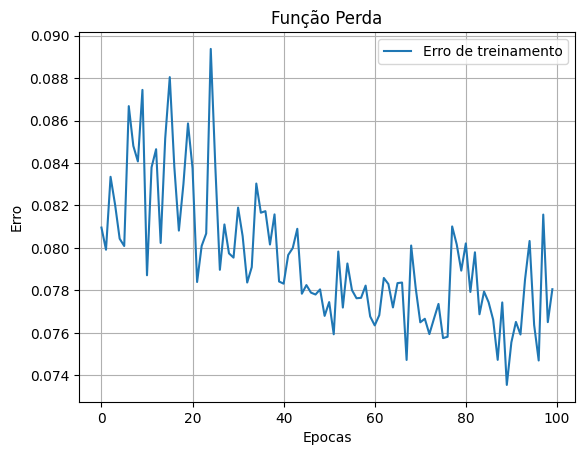

In [ ]:
# Vizualizando o erro de treinamento
plt.plot(history.history['loss'])
plt.title('Função Perda')
plt.ylabel('Erro')
plt.xlabel('Epocas')
plt.legend(['Erro de treinamento'])
plt.grid(True)

In [ ]:
# Teste do modelo

teste = np.array([[5.1, 3.5, 1.4, 0.2]])
teste = sc.transform(teste) # padronização dos dados

saida_predida = model.predict(teste)
print(saida_predida)

1/1 [==============================] - 0s 20ms/step
[[1.2572526e-02 9.8645395e-01 9.7358291e-04]]


In [ ]:
saida_predida = np.argmax(saida_predida, axis=1)
# print(saida_predida)
print("A classe é ", classes[saida_predida[-1]])

A classe é  Iris-versicolor
